In [ ]:
# loading username and keys from kaggle
import os
from google.colab import files
uploaded = files.upload()

import json
with open("kaggle.json") as f:
    keys = json.load(f)
os.environ['KAGGLE_USERNAME'] = keys["username"] 
os.environ['KAGGLE_KEY'] = keys["key"] 

Saving kaggle.json to kaggle.json


In [ ]:
# Importing the libraries
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d crawford/gene-expression
!unzip gene-expression.zip

  0% 0.00/1.41M [00:00<?, ?B/s]
100% 1.41M/1.41M [00:00<00:00, 47.0MB/s]
Archive:  gene-expression.zip
  inflating: actual.csv              
  inflating: data_set_ALL_AML_independent.csv  
  inflating: data_set_ALL_AML_train.csv  


In [ ]:
# Loading the data
actual_df = pd.read_csv('actual.csv')
actual_df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [ ]:
y = actual_df.replace({'ALL':0, 'AML':1})
labels = ['ALL', 'AML']

In [ ]:
# Loading the data
train_data = pd.read_csv('data_set_ALL_AML_train.csv')
test_data  = pd.read_csv('data_set_ALL_AML_independent.csv')

In [ ]:
train_data.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

####Preprocessing of the data

In [ ]:
# dropping call columns and transposing
def remove_call(df):
  for i in df.columns:
    if 'call' in i:
      df = df.drop(columns=[i])
    if 'Gene' in i:
      df = df.drop(columns=[i])
  return df.T

In [ ]:
train_data = remove_call(train_data)
test_data = remove_call(test_data)

In [ ]:
# sorting the index
test_data.index = test_data.index.astype(int)
test_data.sort_index(inplace=True)

In [ ]:
# dividing train an test data
y_train = y[y.patient <= 38].reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)

#### standardization of data 

In [ ]:
# Standardizing Features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

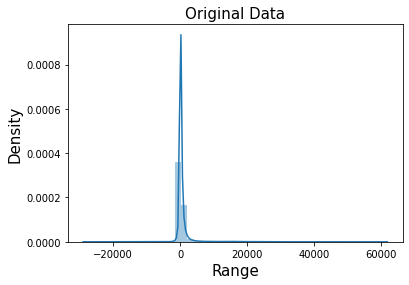

In [ ]:
# Range of original Data
sns.distplot(np.concatenate(train_data.values)).set_title('Original Data',fontsize=15)
plt.tight_layout
plt.xlabel('Range',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

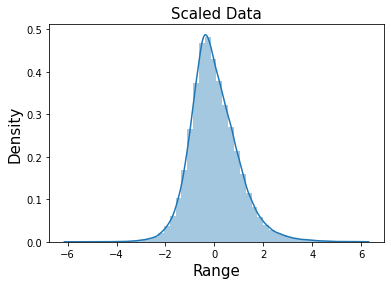

In [ ]:
# Range of Scaled  Data
sns.distplot(np.concatenate(train_scaled)).set_title('Scaled Data',fontsize=15)
plt.tight_layout
plt.xlabel('Range',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

#### Principal component analysis

In [ ]:
# taking 95 percent  variance in data
pca = PCA(n_components = 0.95)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
print(train_pca.shape)
print(test_pca.shape)

(38, 32)
(34, 32)


#### K-Means Clustering

K-means accuracy: 0.735
Root Mean squared error 0.7172835948406506
Mean absolute error 0.2647058823529412


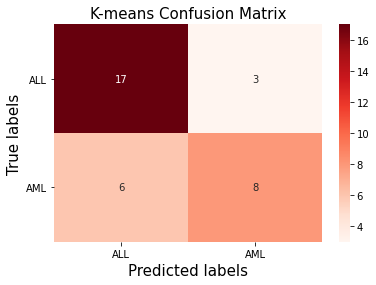

In [ ]:
# performing  K-Means Clustering for two clusters 

kmeans = KMeans(n_clusters=2, random_state=0).fit(train_pca)
km_pred = kmeans.predict(test_pca)

print('K-means accuracy:', round(accuracy_score(y_test.iloc[:,1], km_pred), 3))
print('Root Mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], km_pred,squared=False)))
print('Mean absolute error',mean_absolute_error(y_test.iloc[:,1], km_pred))
cm_km = confusion_matrix(y_test.iloc[:,1], km_pred)

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Reds') 

ax.set_xlabel('Predicted labels',fontsize=16)
ax.set_ylabel('True labels',fontsize=16) 
ax.set_title('K-means Confusion Matrix',fontsize=16) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

#### Gaussian naive bayes

Naive Bayes accuracy: 0.912
Root mean squared error 0.5450176720923848
Mean absolute error 0.08823529411764706


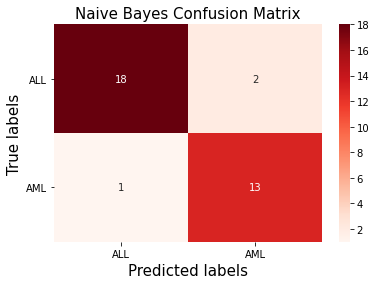

In [ ]:
# performing Gaussian naive bayes
nb_model = GaussianNB()

nb_model.fit(train_scaled, y_train.iloc[:,1])

nb_pred = nb_model.predict(test_scaled)

print('Naive Bayes accuracy:', round(accuracy_score(y_test.iloc[:,1], nb_pred), 3))
print('Root mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], nb_pred,squared=False)))
print('Mean absolute error',mean_absolute_error(y_test.iloc[:,1], nb_pred))
cm_nb =  confusion_matrix(y_test.iloc[:,1], nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='Reds') 

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15) 
ax.set_title('Naive Bayes Confusion Matrix',fontsize=15) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

#### Logistic Regression

Best Parameters:
 {'C': 10, 'penalty': 'l1'}
Logistic Regression accuracy: 0.941
Root mean squared error 0.4924790605054523
Mean absolute error 0.058823529411764705


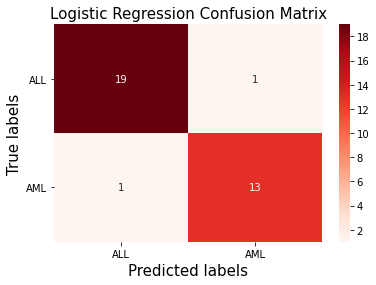

In [ ]:
# performing Logistic Regression with different complexity and penalty

log_grid = {'C': [1e-05, 1e-3, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear')

log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_model.fit(train_scaled, y_train.iloc[:,1])

print("Best Parameters:\n", log_model.best_params_)

best_log = log_model.best_estimator_

log_pred = best_log.predict(test_scaled)

print('Logistic Regression accuracy:', round(accuracy_score(y_test.iloc[:,1], log_pred), 3))
print('Root mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], log_pred,squared=False)))
print('Mean absolute error',mean_absolute_error(y_test.iloc[:,1], log_pred))
cm_log =  confusion_matrix(y_test.iloc[:,1], log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, cmap='Reds') 

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15) 
ax.set_title('Logistic Regression Confusion Matrix',fontsize=15) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

#### Support Vector Machine

Best Parameters:
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVM accuracy: 0.912
Root mean squared error 0.5450176720923848
Mean absolute error 0.08823529411764706


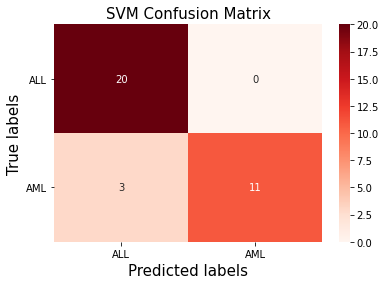

In [ ]:
# performing Support Vector Machine using different parameters
svm_param_grid = {'C': [0.1, 0.3,1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"]} 

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

# Train the classifier
svm_grid.fit(train_scaled, y_train.iloc[:,1])

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

svm_pred = best_svc.predict(test_scaled)

print('SVM accuracy:', round(accuracy_score(y_test.iloc[:,1], svm_pred), 3))
print('Root mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], svm_pred,squared=False)))
print('Mean absolute error',mean_absolute_error(y_test.iloc[:,1], svm_pred))
cm_svm =  confusion_matrix(y_test.iloc[:,1], svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Reds') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15) 
ax.set_title('SVM Confusion Matrix',fontsize=15) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

 #### Random Forest

Best Parameters:
 {'max_features': 0.8, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}
Random Forest accuracy: 0.853
Root mean squared error 0.6192596340984008
Mean absolute error 0.14705882352941177


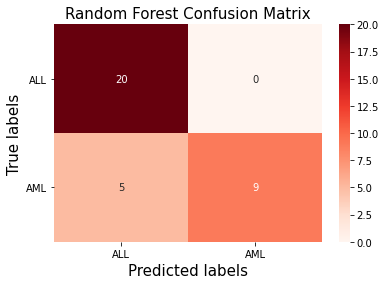

In [ ]:
# performing Random Forest using different params

# Hyperparameters search grid 
raf_param_grid = {
         'n_estimators': [60, 70, 80, 90, 100],
         'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
         'min_samples_leaf': [8, 10, 12, 14],
         'min_samples_split': [3, 5, 7]
        }

# Instantiate random forest classifier
raf_estimator = RandomForestClassifier(random_state=0)

raf_model = GridSearchCV(estimator=raf_estimator, param_grid=raf_param_grid, cv=3, scoring='accuracy')

# Fine-tune the hyperparameters
raf_model.fit(train_scaled, y_train.iloc[:,1])

print("Best Parameters:\n", raf_model.best_params_)

# Get the best model
raf_model_best = raf_model.best_estimator_

raf_pred = raf_model_best.predict(test_scaled)

print('Random Forest accuracy:', round(accuracy_score(y_test.iloc[:,1], raf_pred), 3))
print('Root mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], raf_pred,squared=False)))
print('Mean absolute error',mean_absolute_error(y_test.iloc[:,1], raf_pred))
cm_raf = confusion_matrix(y_test.iloc[:,1], raf_pred)

ax = plt.subplot()
sns.heatmap(cm_raf, annot=True, ax = ax, fmt='g', cmap='Reds') 

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15) 
ax.set_title('Random Forest Confusion Matrix',fontsize=15) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

#### Neural network

In [ ]:
# performing  neural network using relu and sigmoid as activations
NN_model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# using binary crossentropy loss and adam optimizer
NN_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
partial_X_train = train_scaled[:30]
X_val = train_scaled[30:]

y_train_label = y_train.iloc[:,1]
partial_y_train = y_train_label[:30]
y_val = y_train_label[30:]

In [ ]:
train_history = NN_model.fit(
    partial_X_train, partial_y_train,
    validation_data=(X_val, y_val),
    batch_size = 16,
    epochs = 50
)

Epoch 1/50
2/2 [==============================] - 1s 523ms/step - loss: 0.5755 - accuracy: 0.5889 - val_loss: 0.3332 - val_accuracy: 0.8750
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.3778 - val_accuracy: 0.8750
Epoch 3/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.4478 - val_accuracy: 0.8750
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5231 - val_accuracy: 0.8750
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 3.7121e-04 - accuracy: 1.0000 - val_loss: 0.5907 - val_accuracy: 0.8750
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 1.1719e-04 - accuracy: 1.0000 - val_loss: 0.6488 - val_accuracy: 0.8750
Epoch 7/50
2/2 [==============================] - 0s 52ms/step - loss: 6.8057e-05 - accuracy: 1.0000 - val_loss: 0.6981 - val_accuracy: 0.8750
Epoch 8/50
2/2

Neural Network accuracy:  0.794
Root mean squared error 0.6736041912625804
mean absolute error 0.20588235294117646


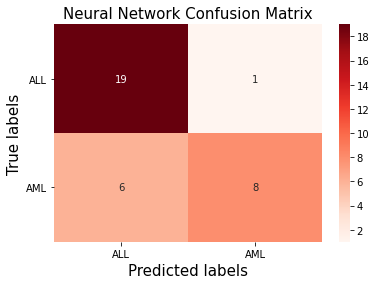

In [ ]:
pred = NN_model.predict_classes(test_scaled)
print('Neural Network accuracy: ', round(accuracy_score(y_test.iloc[:,1], pred), 3))
print('Root mean squared error',sqrt(mean_squared_error(y_test.iloc[:,1], pred,squared=False)))
print('mean absolute error',mean_absolute_error(y_test.iloc[:,1], pred))
cm_nn = confusion_matrix(y_test.iloc[:,1], pred)

ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Reds') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15) 
ax.set_title('Neural Network Confusion Matrix',fontsize=15) 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);